In [1]:
!pip install transformers
!pip install torch torchvision torchaudio
!pip install pillow

In [4]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Saving 스크린샷 2024-12-10 192015.png to 스크린샷 2024-12-10 192015.png
User uploaded file "스크린샷 2024-12-10 192015.png" with length 159823 bytes


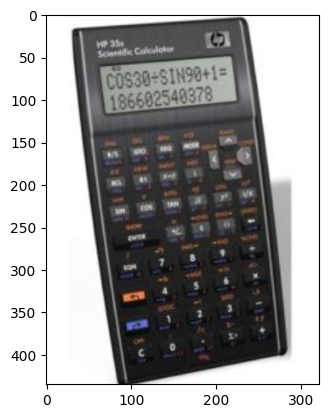

In [3]:
# prompt: image file upload

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(fn)
plt.imshow(img)
plt.show()


In [5]:
inputs = processor(images=img, return_tensors="pt").to(model.device)
caption_ids = model.generate(**inputs, max_length=50, num_beams=5)
caption = processor.decode(caption_ids[0], skip_special_tokens=True)

print("Generated Caption:", caption)

Generated Caption: calcula calcula calcula calcula calcula calcula calcula calcula calcula calcula cal


Saving test.jpg to test.jpg
User uploaded file "test.jpg" with length 109994 bytes


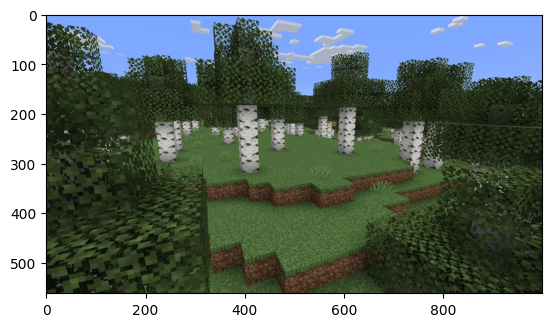

In [6]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
img = Image.open(fn)
plt.imshow(img)
plt.show()

In [7]:
inputs = processor(images=img, return_tensors="pt").to(model.device)
caption_ids = model.generate(**inputs, max_length=50, num_beams=5)
caption = processor.decode(caption_ids[0], skip_special_tokens=True)

print("Generated Caption:", caption)

Generated Caption: an image of a forest in minecraft
